In [ ]:
! pip install -q kaggle

In [ ]:
 from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ranaalmawardy","key":"f5fadd7f3e99dad7955d9a2f53d8d2d7"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 61kB 7.7MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-cp37-none-any.whl size=73053 sha256=74c447010962d412bf477c0532aa1635b4da859e6a8df67bfa46d0c06f9fcaeb
  Stored in directory: /root/.cache/pip/wheels/a1/6a/26/d30b7499ff85a4a4593377a87ecf55f7d08af42f0de9b60303
Successfully built kaggle
  Found existing installation: kaggle 1.5.10
    Uninstalling kaggle-1.5.10:
      Successfully uninstalled kaggle-1.5.10


In [ ]:
! kaggle datasets list


ref                                                         title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              221KB  2021-03-26 07:27:32            994        116  1.0              
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-02-17 16:10:44            778         89  1.0              
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   1GB  2021-02-18 10:08:27            702         84  1.0              
imsparsh/musicnet-dataset                                   MusicNet Dataset              

In [ ]:
!kaggle competitions download -c histopathologic-cancer-detection

100% 6.31G/6.31G [02:16<00:00, 38.0MB/s]
100% 6.31G/6.31G [02:16<00:00, 49.8MB/s]


In [ ]:
! mkdir INPUT
! unzip histopathologic-cancer-detection.zip -d INPUT

Streaming output truncated to the last 5000 lines.
  inflating: INPUT/train/fa2c546059bd262cbe954dfdba24dc0d67f598b0.tif  
  inflating: INPUT/train/fa2c657eff58b6802cb32843caa2fac25b67c2c9.tif  
  inflating: INPUT/train/fa2c775c4457d0aeb7e57216849eef5f4e72e566.tif  
  inflating: INPUT/train/fa2c77e1707c2fe7b0016e00736fb6e4b7f09488.tif  
  inflating: INPUT/train/fa2ce5e802dd281bd98fcfb538e80b9c96c2b7af.tif  
  inflating: INPUT/train/fa2d24e4a109d2d3a925890aaed4e0f038dfffb0.tif  
  inflating: INPUT/train/fa2d7e4865aa7869d2dd85116323b8405c94f1c2.tif  
  inflating: INPUT/train/fa2d8b2e4acf46e278e2e7acbc034c263d970737.tif  
  inflating: INPUT/train/fa2df9148831509a181797db79eb1a7bf39593f1.tif  
  inflating: INPUT/train/fa2e6db0b35484797f58005e3a6e24ca75fbca76.tif  
  inflating: INPUT/train/fa2e80e84594465329bdc0c8d1b3a507275fbb4d.tif  
  inflating: INPUT/train/fa2eaf8ec6267fa928a88775dc15ee25b633c537.tif  
  inflating: INPUT/train/fa2ebf31ff5954570526d4835ac5368fabc1f035.tif  
  inflating: 

In [ ]:
import pandas as pd
labeled_set = pd.read_csv('/content/INPUT/train_labels.csv')

In [ ]:
labeled_set

,id,label
0,f38a6374c348f90b587e046aac6079959adf3835,0
1,c18f2d887b7ae4f6742ee445113fa1aef383ed77,1
2,755db6279dae599ebb4d39a9123cce439965282d,0
3,bc3f0c64fb968ff4a8bd33af6971ecae77c75e08,0
4,068aba587a4950175d04c680d38943fd488d6a9d,0
...,...,...
220020,53e9aa9d46e720bf3c6a7528d1fca3ba6e2e49f6,0
220021,d4b854fe38b07fe2831ad73892b3cec877689576,1
220022,3d046cead1a2a5cbe00b2b4847cfb7ba7cf5fe75,0
220023,f129691c13433f66e1e0671ff1fe80944816f5a2,0


In [ ]:
unlabeled_set = pd.read_csv('/content/INPUT/sample_submission.csv')

In [ ]:
unlabeled_set

,id,label
0,0b2ea2a822ad23fdb1b5dd26653da899fbd2c0d5,0
1,95596b92e5066c5c52466c90b69ff089b39f2737,0
2,248e6738860e2ebcf6258cdc1f32f299e0c76914,0
3,2c35657e312966e9294eac6841726ff3a748febf,0
4,145782eb7caa1c516acbe2eda34d9a3f31c41fd6,0
...,...,...
57453,061847314ded6f81e1cd670748bfa2003442c9c7,0
57454,6f3977130212641fd5808210015a609c658dcbff,0
57455,46935f247278539eca74b54d07d666efb528a753,0
57456,a09bcae08a82120183352e0e869181b2911d3dc1,0


In [ ]:
#importing libraries
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds
import os
import matplotlib.pyplot as plt
print(os.listdir("/content/INPUT"))
import cv2
from keras.preprocessing.image import ImageDataGenerator
import albumentations

# Any results you write to the current directory are saved as output.

from time import time
import seaborn as sns
import plotly.graph_objects as go

from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from tensorflow.keras import Model
from keras.preprocessing.image import ImageDataGenerator

['test', 'train_labels.csv', 'sample_submission.csv', 'train']


In [ ]:
print('Train Images = ',len(os.listdir('/content/INPUT/train')))
print('Test Images = ',len(os.listdir('/content/INPUT/test')))

Train Images =  220025
Test Images =  57458


In [ ]:
import pandas as pd
df = pd.read_csv('/content/INPUT/train_labels.csv')
print(df.head())

                                         id  label
0  f38a6374c348f90b587e046aac6079959adf3835      0
1  c18f2d887b7ae4f6742ee445113fa1aef383ed77      1
2  755db6279dae599ebb4d39a9123cce439965282d      0
3  bc3f0c64fb968ff4a8bd33af6971ecae77c75e08      0
4  068aba587a4950175d04c680d38943fd488d6a9d      0


In [ ]:
df['label'].value_counts()


0    130908
1     89117
Name: label, dtype: int64

In [ ]:
df['id']=df['id'].apply(lambda x: x+'.tif')
print(df['id'])

0         f38a6374c348f90b587e046aac6079959adf3835.tif
1         c18f2d887b7ae4f6742ee445113fa1aef383ed77.tif
2         755db6279dae599ebb4d39a9123cce439965282d.tif
3         bc3f0c64fb968ff4a8bd33af6971ecae77c75e08.tif
4         068aba587a4950175d04c680d38943fd488d6a9d.tif
                              ...                     
220020    53e9aa9d46e720bf3c6a7528d1fca3ba6e2e49f6.tif
220021    d4b854fe38b07fe2831ad73892b3cec877689576.tif
220022    3d046cead1a2a5cbe00b2b4847cfb7ba7cf5fe75.tif
220023    f129691c13433f66e1e0671ff1fe80944816f5a2.tif
220024    a81f84895ddcd522302ddf34be02eb1b3e5af1cb.tif
Name: id, Length: 220025, dtype: object


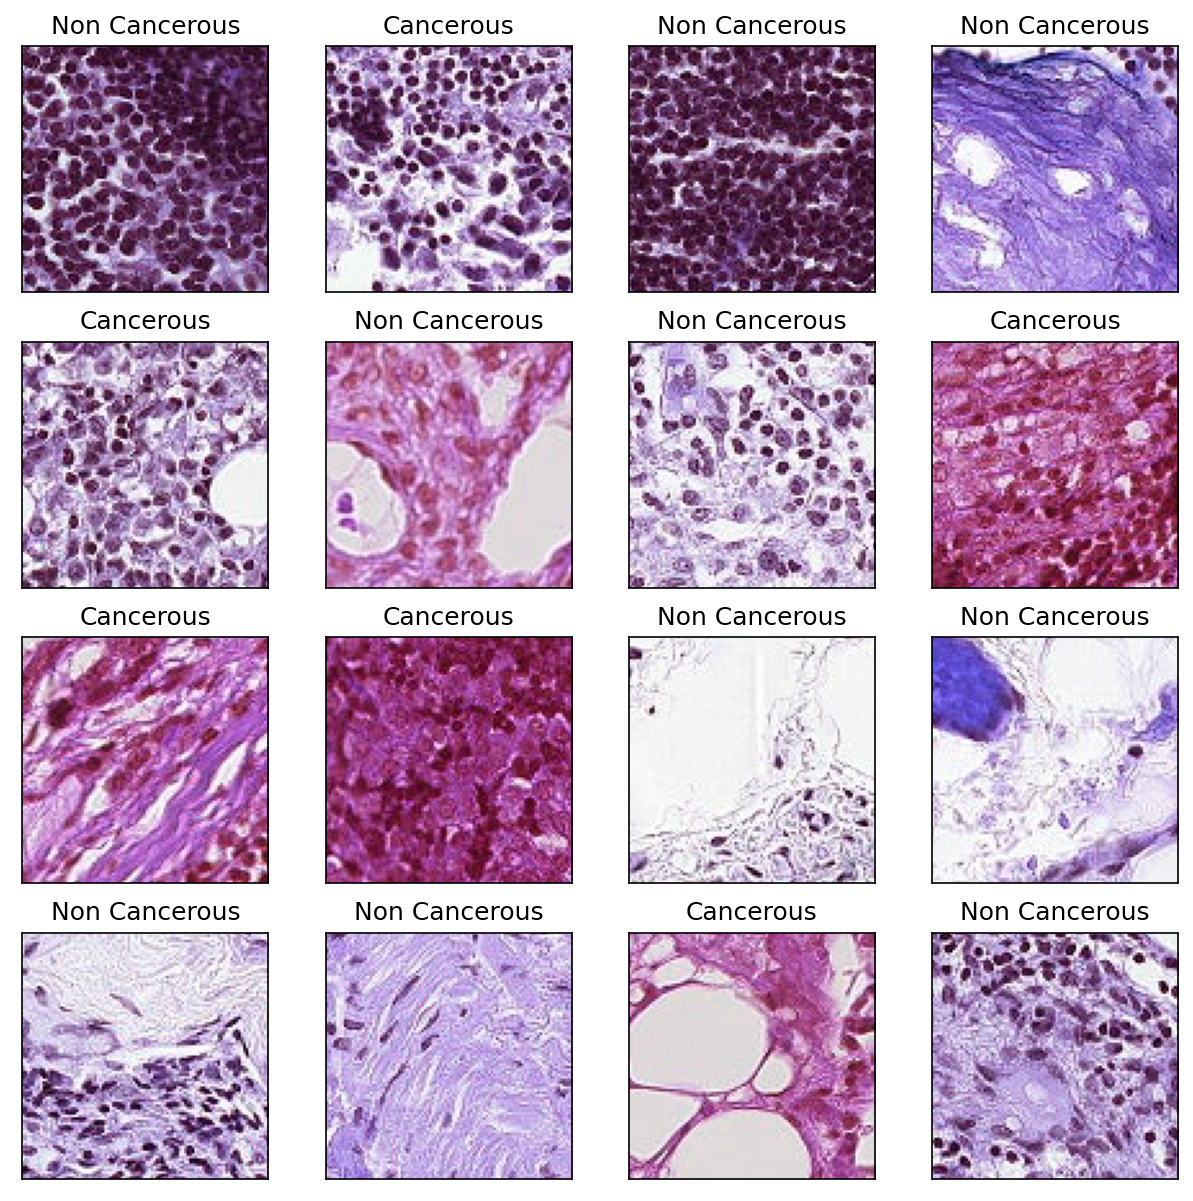

In [ ]:
fig, axs = plt.subplots(4,4,figsize=(10, 10), dpi=150)


images = []
for i in range(4):
    for j in range(4):
        
        No = np.random.randint(0,2000)
                
        image = cv2.imread('/content/INPUT/train/'+ df.iloc[No]['id'])
        images.append(axs[i, j].imshow(image))
        
        if df.iloc[No]['label'] == 1:
            axs[i,j].set_title('Cancerous')
        else:
            axs[i,j].set_title('Non Cancerous')
            
        axs[i,j].set_xticks([])
        axs[i,j].set_yticks([])
     
plt.show()
# This will be helpful for image augmentations, like we can do do channel shuffling in order for the model to extract features well or
# contrast enhancement to make features distinguishable.
del images   

0


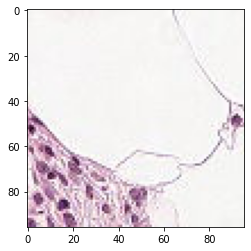

1


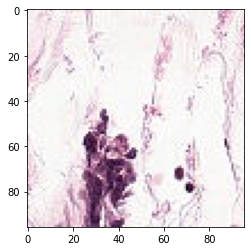

0


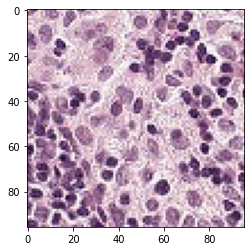

0


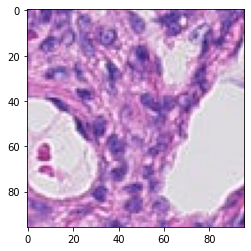

0


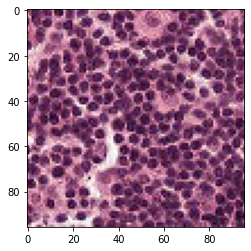

In [ ]:
for i in range(5):
    img = plt.imread("/content/INPUT/train/"+df.iloc[i]['id'])
    print(df.iloc[i]['label'])
    plt.imshow(img)
    plt.show()

In [ ]:
train_path = '/content/INPUT/train/'



The dimensions of the image are 96 pixels width and 96 pixels height, one single color channel
The maximum pixel value is 255.0000 and the minimum is 0.0000
The mean value of the pixels is 232.8901 and the standard deviation is 34.0322


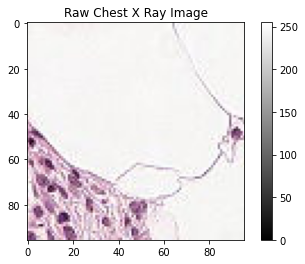

In [ ]:
sample_img = df.id[0]
img_dir = train_path
raw_image = plt.imread(os.path.join(img_dir, sample_img))
plt.imshow(raw_image, cmap='gray')
plt.colorbar()
plt.title('Raw Chest X Ray Image')
print(f"The dimensions of the image are {raw_image.shape[0]} pixels width and {raw_image.shape[1]} pixels height, one single color channel")
print(f"The maximum pixel value is {raw_image.max():.4f} and the minimum is {raw_image.min():.4f}")
print(f"The mean value of the pixels is {raw_image.mean():.4f} and the standard deviation is {raw_image.std():.4f}")

In [ ]:
image_generator = ImageDataGenerator(
samplewise_center=True, #Set each sample mean to 0.
samplewise_std_normalization= True, # Divide each input by its standard deviation
validation_split=0.2,
rescale=1./255,
      rotation_range=3,
      width_shift_range=2,
      height_shift_range=2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest'
)

In [ ]:
train_generator = image_generator.flow_from_dataframe(
dataframe=df,
directory="/content/INPUT/train/",
subset='training',
x_col="id", # features
y_col= ['label'], # labels
class_mode="raw", # 'Mass' column should be in train_df
batch_size= 64, # images per batch
shuffle=False, # shuffle the rows or not
target_size=(96,96) # width and height of output image
)

Found 176020 validated image filenames.


In [ ]:
val_generator=image_generator.flow_from_dataframe(
dataframe=df,
directory="/content/INPUT/train/",
subset='validation',
x_col="id", # features
y_col= ['label'], # labels
class_mode="raw", # 'Mass' column should be in train_df
batch_size= 64, # images per batch
shuffle=False, # shuffle the rows or not
target_size=(96,96) # width and height of output image
)

Found 44005 validated image filenames.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The dimensions of the image are 96 pixels width and 96 pixels height
The maximum pixel value is 4.3283 and the minimum is -14.9099
The mean value of the pixels is -0.0000 and the standard deviation is 1.0000


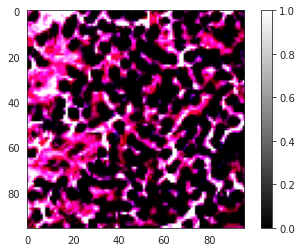

In [ ]:
sns.set_style("white")
generated_image, label = train_generator.__getitem__(0)
plt.imshow(generated_image[0], cmap='gray')
plt.colorbar()

print(f"The dimensions of the image are {generated_image.shape[1]} pixels width and {generated_image.shape[2]} pixels height")
print(f"The maximum pixel value is {generated_image.max():.4f} and the minimum is {generated_image.min():.4f}")
print(f"The mean value of the pixels is {generated_image.mean():.4f} and the standard deviation is {generated_image.std():.4f}")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



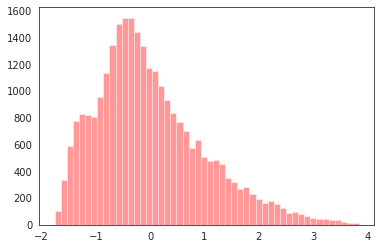

In [ ]:
sns.distplot(generated_image[0].ravel(), 
             label=f'Generated Image: mean {np.mean(generated_image[0]):.4f} - Standard Deviation {np.std(generated_image[0]):.4f} \n'
             f'Min pixel value {np.min(generated_image[0]):.4} - Max pixel value {np.max(generated_image[0]):.4}', 
             color='red', 
             kde=False)

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
pre_trained_model = InceptionV3(
    input_shape=(96, 96, 3),
    include_top=False,
    weights="imagenet"
)
# Make all the layers in the pre-trained model non-trainable
for layer in pre_trained_model.layers:
  layer.trainable = False

pre_trained_model.summary()

87916544/87910968 [==============================] - 0s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 96, 96, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 47, 47, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 47, 47, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 47, 47, 32)   0           batch_normalization[0][0]        
______________________

In [ ]:
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 4, 4, 768)


In [ ]:
# Define a Callback class that stops training once accuracy reaches 99.9%
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.999):
      print("\nReached 99.9% accuracy so cancelling training!")
      self.model.stop_training = True

In [ ]:
#optmizer
opt= tf.keras.optimizers.Adam(learning_rate=0.001)

#MOdel
# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(.2)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense(1, activation='sigmoid')(x)

model = Model(pre_trained_model.input, x) 

model.compile(
    optimizer=opt, 
    loss='binary_crossentropy', 
    metrics=['accuracy']
)

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 96, 96, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 47, 47, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 47, 47, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 47, 47, 32)   0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [ ]:
callbacks = myCallback()
history = model.fit_generator(
    train_generator,
    steps_per_epoch=len(train_generator), 
    validation_data=val_generator,
    validation_steps=len(val_generator),
    epochs=50,
    verbose=1,
    callbacks=[callbacks]
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning:

`Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.



Epoch 1/50
2751/2751 [==============================] - 821s 285ms/step - loss: 0.4410 - accuracy: 0.8135 - val_loss: 0.3577 - val_accuracy: 0.8420
Epoch 2/50
2751/2751 [==============================] - 722s 263ms/step - loss: 0.3586 - accuracy: 0.8440 - val_loss: 0.3492 - val_accuracy: 0.8464
Epoch 3/50
2751/2751 [==============================] - 709s 258ms/step - loss: 0.3445 - accuracy: 0.8512 - val_loss: 0.3319 - val_accuracy: 0.8584
Epoch 4/50
2751/2751 [==============================] - 704s 256ms/step - loss: 0.3357 - accuracy: 0.8549 - val_loss: 0.3319 - val_accuracy: 0.8599
Epoch 5/50
2751/2751 [==============================] - 701s 255ms/step - loss: 0.3279 - accuracy: 0.8584 - val_loss: 0.3258 - val_accuracy: 0.8603
Epoch 6/50
2751/2751 [==============================] - 699s 254ms/step - loss: 0.3237 - accuracy: 0.8614 - val_loss: 0.3265 - val_accuracy: 0.8626
Epoch 7/50
2751/2751 [==============================] - 699s 254ms/step - loss: 0.3207 - accuracy: 0.8626 - val_

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [ ]:
model.save('/tmp/model')


In [ ]:
#test algorithm with image
my_image = "my_image.jpg"   # change this to the name of your image file 
# now it will preprocess the image to fit your algorithm.
fname = "images/" + my_image
image = np.array(ndimage.imread(fname, flatten=False))
image = image/255.
my_image = scipy.misc.imresize(image, size=(num_px,num_px)).reshape((1, num_px*num_px*3)).T
my_predicted_image = predict(d["w"], d["b"], my_image)

plt.imshow(image)
print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")